# Misc

Independent packages or definitions I learnt through learning this project. 

## Properties

An exploration into `@property` via [these guys](https://www.programiz.com/python-programming/property).

In [21]:
class Celsius:
    def __init__(self, temperature = 0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

In [23]:
man = Celsius()
man.temperature = 37
man.temperature

37

In [24]:
# When retrieving these values, its analgous to searching this classes dictionary 
man.__dict__

{'temperature': 37}

Now we have an update forcing Celsuis to remain greater than -273 (Absolute Zero). Use getting and setting to incorporate this new rule.

### Getting and Setting

In [25]:
class Celsius:
    def __init__(self, temperature = 0):
        self.set_temperature(temperature) # sets the temperature via set_temperature, not the internal dict

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32 # same as before

    # new update
    def get_temperature(self):
        return self._temperature # new get_temperature function assigns temp to hidden _temperature

    def set_temperature(self, value):
        if value < -273:
            raise ValueError("Temperature below -273 is not possible")
        self._temperature = value # Checks if less than -273, raises ValueError else returns value

In [27]:
c = Celsius(-272)
c.get_temperature()

-272

In [29]:
# Note that despite the _, still a regular variable to the language; just a private convention
c.__dict__

{'_temperature': -272}

Technically a valid refactor, but the bigger problem is that all the users who implemented the previous clas have to modify their class from `obj.temperature = val` to `obj.get_temperature(val)`, which can lead to serious issues. Our update was not backwards complete.

### The `@property` factory method

The pythonic way to deal with the above problem is to use property. Here is how we could have achieved it.

In [36]:
class Celsius:
    def __init__(self, temperature = 0):
        self.temperature = temperature # same variable definition as the original class

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32 # same

    def get_temperature(self):
        print("Getting value")
        return self._temperature # returns that hidden variable

    def set_temperature(self, value):
        if value < -273:
            raise ValueError("Temperature below -273 is not possible")
        print("Setting value")
        self._temperature = value # checks that hidden variable for the condition
        
    temperature = property(get_temperature,set_temperature) # makes a proprety object temperature, which attaches
                                                            # the code get_temperature and set_temperature to the
                                                            # attribute temperature

Now, any code that retrieves the value of temperature will automatically call get_temperature() instead of a dictionary (__dict__) look-up. Similarly, any code that assigns a value to temperature will automatically call set_temperature(). 

In [39]:
c = Celsius()

Setting value


In [40]:
c.temperature = 37

Setting value


In [41]:
c.to_fahrenheit()

Getting value


98.60000000000001

By using property, we can see that, we modified our class and implemented the value constraint without any change required to the client code. Thus our implementation was backward compatible.

The reason is that when an object is created, `__init__()` method gets called. This method has the line `self.temperature = temperature`. This assignment automatically called set_temperature().

Let's dig deeper:

`property(fget=None, fset=None, fdel=None, doc=None)`

Where: 
* `fget` is function to get value of the attribute
* `fset` is function to set value of the attribute
* `fdel` is function to delete the attribute
* `doc` is a string (like a comment). 

As seen from the implementation above , these function arguments are optional; a property object can simply be created via:

In [42]:
property()

A property object has three methods, `getter()`, `setter()`, and `delete()` to specify `fget`, `fset` and `fdel` at a later point. 

This means, the line:

In [ ]:
temperature = property(get_temperature,set_temperature)

Is equivalent to:

In [56]:
# make empty property
temperature = property()

# grab the functions from before
def get_temperature(self):
    print("Getting value")
    return self._temperature # returns that hidden variable

def set_temperature(self, value):
    if value < -273:
        raise ValueError("Temperature below -273 is not possible")
    print("Setting value")
    self._temperature = value # checks that hidden variable for the condition

def del_temperature(self):
    print("Clearing value")
    return 0
    
# assign fget; the getter
temperature = temperature.getter(get_temperature)

# assign fset; the setter
temperature = temperature.setter(set_temperature)

# assign fdel; the deleter
temperature = temperature.deleter(del_temperature)

In [58]:
temperature.getter(3)

The above construct can be implemented as a decorator. In fact, we can go even further and not define names `get_temperature` and `set_temperature` as they are unnecessary and pollute the class namespace. For this, we reuse the name `temperature` while defining our getter and setter functions. 

This is how it can be done:

In [50]:
class Celsius:
    def __init__(self, temperature = 0):
        self._temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    @property
    def temperature(self):
        print("Getting value")
        return self._temperature
    
    @temperature.setter
    def temperature(self, value):
        if value < -273:
            raise ValueError("Temperature below -273 is not possible")
        print("Setting value")
        self._temperature = value

## Seaborn

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

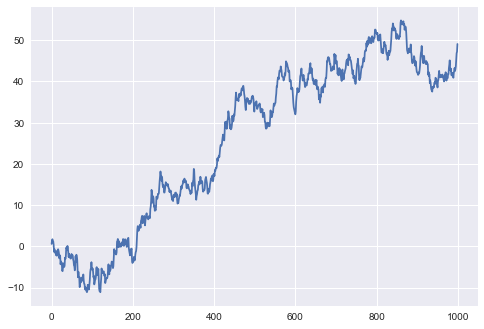

In [13]:
sns.set_style("darkgrid")
plt.plot(np.cumsum(np.random.randn(1000,1)))
plt.show()

In [20]:
titanic = sns.load_dataset("titanic")

type(titanic)

pandas.core.frame.DataFrame

In [ ]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [ ]:
import pandas as pd

pd.

In [ ]:
g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic,
                   size=6, kind="bar", palette="muted")

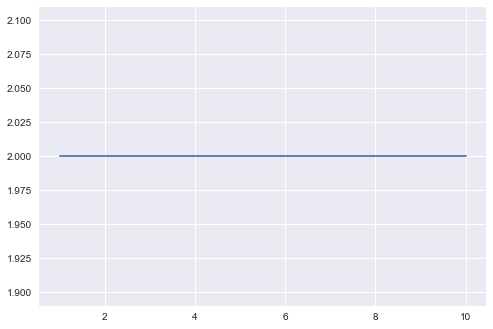

In [18]:
plt.plot([10,1,1,1,1],[2,2,2,2,2])
plt.show()